In [1]:
#Question 1.2
import quandl as ql
import numpy as np
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [44]:
api_key = '45a671b07f7e280524342638a6a968a30d43fa508db3f409efc6d10ae1f112c9'
apiurl = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&api_key={api_key}'
ETH = requests.get(apiurl).json()['Data']['Data']
Yt_1 = pd.DataFrame(ETH)[['time', 'open']].set_index('time')

In [45]:
ToTimeStamp = ETH[0]['time']
apiurl = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&toTs={ToTimeStamp}&api_key={api_key}'
ETH1 = requests.get(apiurl).json()['Data']['Data']
Yt_2 = pd.DataFrame(ETH1)[['time', 'open']].set_index('time')

In [46]:
ToTimeStamp = ETH1[0]['time']
apiurl = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&toTs={ToTimeStamp}&api_key={api_key}'
ETH2 = requests.get(apiurl).json()['Data']['Data']
Yt_3 = pd.DataFrame(ETH2)[['time', 'open']].set_index('time')
Yt_data = pd.concat([Yt_3,Yt_2,Yt_1])
Yt_data.index = pd.to_datetime(Yt_data.index, unit = 's')
Yt_data = Yt_data[ Yt_data.index > '2010-07-17'] 
Yt_data.reset_index(inplace=True)
Yt_data.rename(columns ={'time':'Date'}, inplace='True')
Yt_data.dtypes

Date    datetime64[ns]
open           float64
dtype: object

In [47]:
ql.ApiConfig.api_key = "xYnfmE6af5Q5EcdGoBaJ"
Xt = pd.DataFrame(ql.get("MULTPL/SP500_REAL_PRICE_MONTH"))
Xt = Xt[ Xt.index > '2010-07-17'] 
Xt.reset_index(inplace=True)
Xt.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [51]:
df = Xt.merge(Yt_data, how ='left', on='Date')
df.rename(columns ={'Value':'Xt','open':'Yt'}, inplace='True')
df

,Date,Xt,Yt
0,2010-08-01,1087.28,0.00
1,2010-09-01,1122.08,0.00
2,2010-10-01,1171.58,0.00
3,2010-11-01,1198.89,0.00
4,2010-12-01,1241.53,0.00
...,...,...,...
158,2022-02-01,4435.98,2689.14
159,2022-02-28,4373.94,2617.32
160,2022-03-01,4281.21,2919.85
161,2022-03-31,4530.41,3385.11


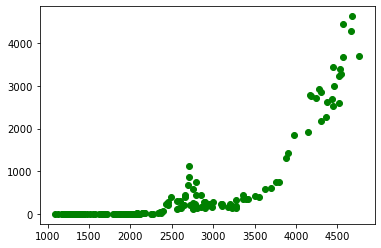

In [49]:
plt.plot(df.Xt,df.Yt,'go')

In [52]:
beta = ((np.multiply(df.Yt, df.Xt)).mean()-np.mean(df.Xt)*np.mean(df.Yt))/((np.multiply(df.Xt,df.Xt)).mean()-np.mean(df.Xt)*np.mean(df.Xt))
alpha =np.mean(df.Yt)-beta*np.mean(df.Xt)
print("alpha =",alpha, "\nbeta =",beta)

alpha = -1641.776095224122 
beta = 0.8591700492914814


In [53]:
type((np.multiply(df.Yt, df.Xt)))
y_hat = alpha + np.multiply(beta,df.Xt)
L = np.sum(np.multiply(df.Yt - y_hat,df.Yt - y_hat))
L

61881437.405698344

In [54]:
result = sm.ols('Yt~Xt',data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     Yt   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     320.9
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           3.60e-40
Time:                        08:43:52   Log-Likelihood:                -1278.3
No. Observations:                 163   AIC:                             2561.
Df Residuals:                     161   BIC:                             2567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1641.7761    132.111    -12.427      0.0

In [55]:
def  cal_cost(a,b,x,y):
        n = len(y)
        pred = a + np.multiply(b,x)
        cost = (1/2*n) * np.sum(np.square(pred-y))
        return cost

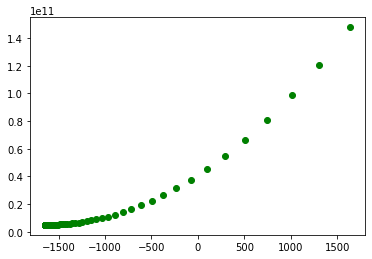

In [56]:
itr = 1000
alpha = 2000
n = len(df.Yt)

loss_his = np.zeros((itr,1))
alpha_his = np.zeros((itr,1))

for i in range(itr):
        pred = alpha + np.multiply(beta,df.Xt)
        res= df.Yt-pred
        res_sum = sum(res)
        gradient = -(1/n)*0.1*res_sum
 
        alpha = alpha - gradient
    
        loss_his[i] = cal_cost(alpha,beta,df.Xt,df.Yt)
        alpha_his[i] = alpha
    
plt.plot(alpha_his,loss_his,'go')

In [14]:
#Question 4
import requests
import json
import pandas as pd
import datetime

In [59]:
lim = '30'
pair = ['ETH','BSV','BTC','XRP','LTC','DOGE','BCH','BNB','XTZ','EOS','XLM']
coins = pd.DataFrame()

In [60]:
api_Key = "45a671b07f7e280524342638a6a968a30d43fa508db3f409efc6d10ae1f112c9"

In [61]:
for i in pair:
    URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym='+i+'&tsym=USD&limit='+lim+ '&api_key='
    URL = URL_A + api_Key
    data = requests.get(URL)
    json_data = data.json()
    table = pd.json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    coins = pd.concat([coins, table.high], axis=1)
coins.columns = pair

In [62]:
coins.columns = pair
coins = coins[pair]
coins

,ETH,BSV,BTC,XRP,LTC,DOGE,BCH,BNB,XTZ,EOS,XLM
2022-03-30 00:00:00,3443.99,100.14,47690.62,0.8715,134.07,0.1454,386.65,449.58,3.889,3.055,0.2376
2022-03-31 00:00:00,3445.59,95.87,47599.87,0.8731,132.89,0.1478,391.15,452.38,4.029,3.022,0.2412
2022-04-01 00:00:00,3481.39,97.46,46726.20,0.8340,126.40,0.1429,389.50,448.13,3.979,2.869,0.2328
2022-04-02 00:00:00,3531.17,99.98,47208.84,0.8500,128.34,0.1444,382.94,454.26,4.130,2.939,0.2374
2022-04-03 00:00:00,3580.76,101.83,47432.60,0.8521,129.53,0.1495,381.27,455.99,4.068,2.866,0.2384
2022-04-04 00:00:00,3546.88,101.00,46893.71,0.8433,128.89,0.1565,379.54,450.52,4.048,2.943,0.2372
2022-04-05 00:00:00,3553.56,97.24,47187.66,0.8360,127.35,0.1796,382.14,460.07,3.930,2.911,0.2341
2022-04-06 00:00:00,3407.48,92.49,45518.32,0.8184,123.12,0.1743,367.69,444.71,3.679,2.760,0.2255
2022-04-07 00:00:00,3269.19,91.63,43894.70,0.7905,116.15,0.1483,339.89,439.08,3.429,2.538,0.2146
2022-04-08 00:00:00,3313.28,88.22,43982.39,0.7935,115.25,0.1534,338.59,441.15,3.428,2.526,0.2135


In [63]:
coins_lagged=coins.copy()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = coins.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in coins.columns]
    
    coins_lagged = pd.concat((coins_lagged, shifted), axis=1)
coins_lagged = coins_lagged.dropna()

In [64]:
coins_lagged

,ETH,BSV,BTC,XRP,LTC,DOGE,BCH,BNB,XTZ,EOS,...,BSV_lag1,BTC_lag1,XRP_lag1,LTC_lag1,DOGE_lag1,BCH_lag1,BNB_lag1,XTZ_lag1,EOS_lag1,XLM_lag1
2022-03-31 00:00:00,3445.59,95.87,47599.87,0.8731,132.89,0.1478,391.15,452.38,4.029,3.022,...,100.14,47690.62,0.8715,134.07,0.1454,386.65,449.58,3.889,3.055,0.2376
2022-04-01 00:00:00,3481.39,97.46,46726.20,0.8340,126.40,0.1429,389.50,448.13,3.979,2.869,...,95.87,47599.87,0.8731,132.89,0.1478,391.15,452.38,4.029,3.022,0.2412
2022-04-02 00:00:00,3531.17,99.98,47208.84,0.8500,128.34,0.1444,382.94,454.26,4.130,2.939,...,97.46,46726.20,0.8340,126.40,0.1429,389.50,448.13,3.979,2.869,0.2328
2022-04-03 00:00:00,3580.76,101.83,47432.60,0.8521,129.53,0.1495,381.27,455.99,4.068,2.866,...,99.98,47208.84,0.8500,128.34,0.1444,382.94,454.26,4.130,2.939,0.2374
2022-04-04 00:00:00,3546.88,101.00,46893.71,0.8433,128.89,0.1565,379.54,450.52,4.048,2.943,...,101.83,47432.60,0.8521,129.53,0.1495,381.27,455.99,4.068,2.866,0.2384
2022-04-05 00:00:00,3553.56,97.24,47187.66,0.8360,127.35,0.1796,382.14,460.07,3.930,2.911,...,101.00,46893.71,0.8433,128.89,0.1565,379.54,450.52,4.048,2.943,0.2372
2022-04-06 00:00:00,3407.48,92.49,45518.32,0.8184,123.12,0.1743,367.69,444.71,3.679,2.760,...,97.24,47187.66,0.8360,127.35,0.1796,382.14,460.07,3.930,2.911,0.2341
2022-04-07 00:00:00,3269.19,91.63,43894.70,0.7905,116.15,0.1483,339.89,439.08,3.429,2.538,...,92.49,45518.32,0.8184,123.12,0.1743,367.69,444.71,3.679,2.760,0.2255
2022-04-08 00:00:00,3313.28,88.22,43982.39,0.7935,115.25,0.1534,338.59,441.15,3.428,2.526,...,91.63,43894.70,0.7905,116.15,0.1483,339.89,439.08,3.429,2.538,0.2146
2022-04-09 00:00:00,3268.83,87.25,42813.04,0.7664,112.91,0.1446,327.65,428.12,3.218,2.446,...,88.22,43982.39,0.7935,115.25,0.1534,338.59,441.15,3.428,2.526,0.2135


In [65]:
coins_lagged.to_csv('cryto_pricedata.csv', index_label='time')
df = pd.read_csv('cryto_pricedata.csv', index_col='time')

In [66]:
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()

In [67]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

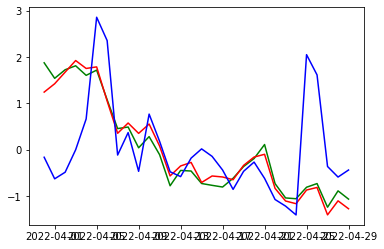

In [68]:
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)
plt.plot(df_scaled.index, df_scaled['BTC'], color='green')
plt.plot(df_scaled.index, df_scaled['ETH'], color='red')
plt.plot(df_scaled.index, df_scaled['DOGE'], color='blue')

In [69]:
split = int(int(lim)/2)

In [70]:
Ytrain = pd.DataFrame(df_scaled[:split]['BTC'])
Ytest = pd.DataFrame(df_scaled[split:]['BTC'])
X = df_scaled[['BTC_lag1','BSV_lag1', 'ETH_lag1','BCH_lag1','LTC_lag1','EOS_lag1','XRP_lag1','BNB_lag1','XTZ_lag1','XLM_lag1','DOGE_lag1']]

In [71]:
from sklearn.linear_model import ElasticNet
import numpy as np
en = ElasticNet(alpha=0.1, normalize=False)
en.fit(X[:split], Ytrain)
coef = list(en.coef_)
coef

[0.0,
 0.3004891595572221,
 0.0,
 0.0,
 0.02039138436601595,
 0.24014895824232022,
 0.0,
 0.0,
 0.14192305678131056,
 0.14740395033376008,
 -0.10020334772561602]

In [72]:
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1

BTC_lag1 : 0.0
BSV_lag1 : 0.3004891595572221
ETH_lag1 : 0.0
BCH_lag1 : 0.0
LTC_lag1 : 0.02039138436601595
EOS_lag1 : 0.24014895824232022
XRP_lag1 : 0.0
BNB_lag1 : 0.0
XTZ_lag1 : 0.14192305678131056
XLM_lag1 : 0.14740395033376008
DOGE_lag1 : -0.10020334772561602


In [73]:
BTC_fitted = X.dot(coef)
BTC_fitted

time
2022-03-31    1.475914
2022-04-01    1.317552
2022-04-02    1.168267
2022-04-03    1.435664
2022-04-04    1.380672
2022-04-05    1.337347
2022-04-06    0.848111
2022-04-07    0.360074
2022-04-08    0.137419
2022-04-09   -0.082181
2022-04-10   -0.271623
2022-04-11   -0.338153
2022-04-12   -0.771315
2022-04-13   -0.773988
2022-04-14   -0.399910
2022-04-15   -0.511947
2022-04-16   -0.274706
2022-04-17   -0.038047
2022-04-18   -0.044580
2022-04-19   -0.274600
2022-04-20   -0.004611
2022-04-21    0.154461
2022-04-22    0.002246
2022-04-23   -0.402620
2022-04-24   -0.603826
2022-04-25   -0.598524
2022-04-26   -0.995696
2022-04-27   -1.119621
2022-04-28   -1.117060
2022-04-29   -0.994720
Freq: D, dtype: float64

In [74]:
BTC_actual = df_scaled[['BTC']]
BTC_actual

,BTC
time,
2022-03-31,1.874976
2022-04-01,1.540916
2022-04-02,1.725460
2022-04-03,1.811018
2022-04-04,1.604966
2022-04-05,1.717361
2022-04-06,1.079066
2022-04-07,0.458253
2022-04-08,0.491782


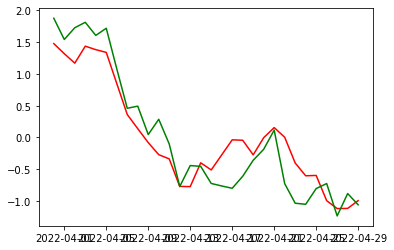

In [75]:
plt.plot(df_scaled.index, BTC_fitted, color='red')
plt.plot(df_scaled.index, BTC_actual , color='green')

In [76]:
y = BTC_actual
X = BTC_fitted
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)
sample_size = len(df_scaled)
squared_residuals = np.square(X-y)
sum_squared_residuals = np.sum(squared_residuals)
sum_squared_residuals

4.088564345377477

In [77]:
MSE = sum_squared_residuals/sample_size
MSE

0.13628547817924921

In [78]:
from sklearn.linear_model import LinearRegression
X = df_scaled[['BTC_lag1']]
y = df_scaled['BTC']
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)
lr = LinearRegression()

In [79]:
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

[-2.7459297e-15] [[0.94826521]]


In [80]:
forecast_BTC = lr.predict(X)

In [81]:
squared_residuals = np.square(forecast_BTC-y)

In [82]:
MSE = (np.sum(squared_residuals))/len(y)
MSE

0.10079308623017749